In [ ]:
query = """
SELECT *
FROM `stockprediction-434721.stock_data.aapl_prices`
WHERE CAST(Date AS DATE) >= DATE_SUB(CURRENT_DATE(), INTERVAL 5 YEAR)
"""

apple_df = client.query(query).to_dataframe()

In [ ]:
apple_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2020-09-11 00:00:00+00:00,114.570000,115.230003,110.000000,112.0000,109.451408,180860300,AAPL
1,2024-04-17 00:00:00+00:00,169.610001,170.649994,168.000000,168.0000,167.578476,50901200,AAPL
2,2023-03-24 00:00:00+00:00,158.860001,160.339996,157.850006,160.2500,158.999222,59196500,AAPL
3,2024-01-03 00:00:00+00:00,184.220001,185.880005,183.429993,184.2500,183.553467,58414500,AAPL
4,2024-05-31 00:00:00+00:00,191.440002,192.570007,189.910004,192.2500,192.027725,75158300,AAPL
5,2022-12-15 00:00:00+00:00,141.110001,141.800003,136.029999,136.5000,135.228119,98931900,AAPL
6,2021-07-12 00:00:00+00:00,146.210007,146.320007,144.000000,144.5000,141.907516,76299700,AAPL
7,2020-04-13 00:00:00+00:00,67.077499,68.425003,66.457497,68.3125,66.457993,131022800,AAPL
8,2019-11-04 00:00:00+00:00,64.332497,64.462502,63.845001,64.3750,62.292084,103272000,AAPL
9,2023-07-24 00:00:00+00:00,193.410004,194.910004,192.250000,192.7500,191.510086,45377800,AAPL


**CLEANING AND PREPROCESSING:**

In [ ]:
# Check for any missing or null values
print(apple_df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Ticker       0
dtype: int64


In [ ]:
import pandas as pd
# Ensure that Date is in datetime format
apple_df['Date'] = pd.to_datetime(apple_df['Date'])

In [ ]:
# Drop columns that are not necessary for modeling
# Adjust this based on your needs
apple_df = apple_df.drop(columns=['Adj Close'])

In [ ]:
# Sort data by Date in ascending order
apple_df = apple_df.sort_values(by='Date', ascending=True)

In [ ]:
# Preview updated dataframes
print(apple_df.head())

                          Date       Open       High        Low      Close  \
21   2019-09-13 00:00:00+00:00  55.000000  55.197498  54.255001  54.687500   
1035 2019-09-16 00:00:00+00:00  54.432499  55.032501  54.389999  54.974998   
479  2019-09-17 00:00:00+00:00  54.990002  55.205002  54.779999  55.174999   
1248 2019-09-18 00:00:00+00:00  55.264999  55.712502  54.860001  55.692501   
579  2019-09-19 00:00:00+00:00  55.502499  55.939999  55.092499  55.240002   

         Volume Ticker  
21    159053200   AAPL  
1035   84632400   AAPL  
479    73274800   AAPL  
1248  101360000   AAPL  
579    88242400   AAPL  


**FEATURE ENGINEERING:**

1. Create Rolling Features:
Moving Averages (e.g., 7-day, 30-day): These smooth out stock prices and reveal trends.
Volatility (Standard deviation of returns): Indicates stock price variability.
2. Create Lag Features:
Previous day's prices: Prices from a few days ago can help the model see short-term trends.
3. Compute Returns:
Daily returns: Percentage change from one day to the next.


In [ ]:
# Feature Engineering for apple

# 1. Moving Averages
apple_df['7_day_MA'] = apple_df['Close'].rolling(window=7).mean()
apple_df['30_day_MA'] = apple_df['Close'].rolling(window=30).mean()

# 2. Volatility (Standard deviation of daily returns over 7 and 30 days)
apple_df['7_day_volatility'] = apple_df['Close'].pct_change().rolling(window=7).std()
apple_df['30_day_volatility'] = apple_df['Close'].pct_change().rolling(window=30).std()

# 3. Lag Features (Previous day's price and volume)
apple_df['Previous_Close'] = apple_df['Close'].shift(1)
apple_df['Previous_Volume'] = apple_df['Volume'].shift(1)

# 4. Daily Returns
apple_df['Daily_Return'] = apple_df['Close'].pct_change()

# Preview updated dataframe for apple
print(apple_df.head())

                          Date       Open       High        Low      Close  \
21   2019-09-13 00:00:00+00:00  55.000000  55.197498  54.255001  54.687500   
1035 2019-09-16 00:00:00+00:00  54.432499  55.032501  54.389999  54.974998   
479  2019-09-17 00:00:00+00:00  54.990002  55.205002  54.779999  55.174999   
1248 2019-09-18 00:00:00+00:00  55.264999  55.712502  54.860001  55.692501   
579  2019-09-19 00:00:00+00:00  55.502499  55.939999  55.092499  55.240002   

         Volume Ticker  7_day_MA  30_day_MA  7_day_volatility  \
21    159053200   AAPL       NaN        NaN               NaN   
1035   84632400   AAPL       NaN        NaN               NaN   
479    73274800   AAPL       NaN        NaN               NaN   
1248  101360000   AAPL       NaN        NaN               NaN   
579    88242400   AAPL       NaN        NaN               NaN   

      30_day_volatility  Previous_Close  Previous_Volume  Daily_Return  
21                  NaN             NaN             <NA>           

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Ticker                0
7_day_MA              6
30_day_MA            29
7_day_volatility      7
30_day_volatility    30
Previous_Close        1
Previous_Volume       1
Daily_Return          1
dtype: int64


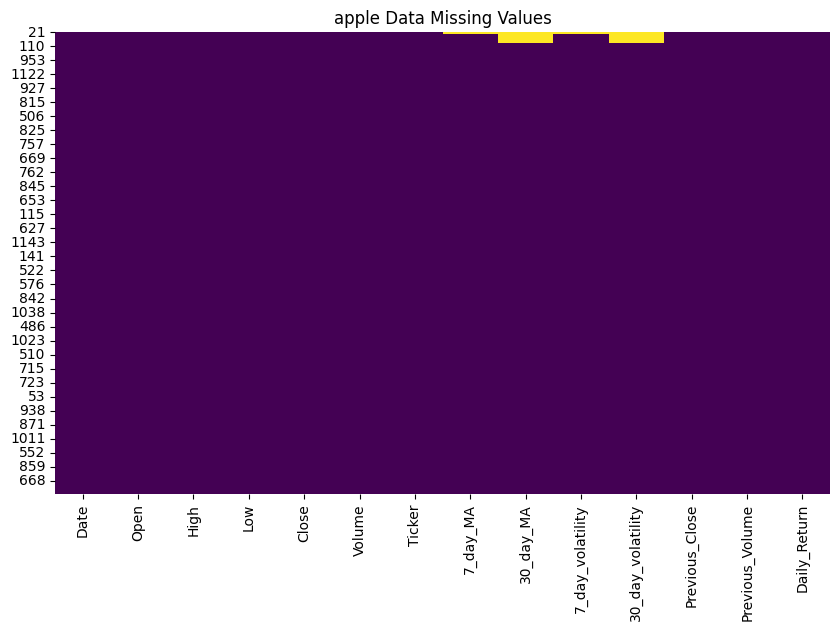

In [ ]:
# Check for missing values in each column for apple
print(apple_df.isna().sum())

# Visualize where NaNs occur in apple data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(apple_df.isna(), cbar=False, cmap="viridis")
plt.title('apple Data Missing Values')
plt.show()

Based on the heatmaps and summary, it looks like the missing values are indeed concentrated at the beginning of each dataset, particularly in the moving averages and volatility columns. Since these are rolling calculations, it's normal to see NaN values at the start.

It would be appropriate to drop the rows that contain these NaN values since they appear at the beginning and are not informative for future predictions.

In [ ]:
# Drop rows with NaN values in the apple dataframe
apple_df_cleaned = apple_df.dropna()

# Preview the cleaned apple dataframe
print(apple_df_cleaned.head())

                          Date       Open       High        Low      Close  \
537  2019-10-25 00:00:00+00:00  60.790001  61.682499  60.720001  61.645000   
921  2019-10-28 00:00:00+00:00  61.855000  62.312500  61.680000  62.262501   
831  2019-10-29 00:00:00+00:00  62.242500  62.437500  60.642502  60.822498   
1136 2019-10-30 00:00:00+00:00  61.189999  61.325001  60.302502  60.814999   
1121 2019-10-31 00:00:00+00:00  61.810001  62.292500  59.314999  62.189999   

         Volume Ticker   7_day_MA  30_day_MA  7_day_volatility  \
537    73477200   AAPL  60.196429  57.078333          0.007133   
921    96572800   AAPL  60.688214  57.321250          0.007018   
831   142839600   AAPL  60.933928  57.509500          0.013862   
1136  124522000   AAPL  61.032143  57.680250          0.012615   
1121  139162000   AAPL  61.346428  57.911916          0.014651   

      30_day_volatility  Previous_Close  Previous_Volume  Daily_Return  
537            0.011972       60.895000         69275200     

In [ ]:
print(apple_df_cleaned.shape)

(1222, 14)


Exporting to CSV to update BigQuery table:

In [ ]:
# Export the cleaned and feature-engineered dataframe to a CSV file
apple_df_cleaned.to_csv('apple_cleaned_feature_engineered.csv', index=False)
print("Dataframe exported to CSV.")

Dataframe exported to CSV.


In [ ]:
from google.colab import files

# Download the apple CSV file to your local machine
files.download('apple_cleaned_feature_engineered.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**MODEL TRAINING:**

Step 1: Split the Data into Training and Testing Sets

* Training Set: 80% of the data, used to train the model.
* Testing Set: 20% of the data, used to evaluate the model's accuracy.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X_apple = apple_df_cleaned[['7_day_MA', '30_day_MA', '7_day_volatility', '30_day_volatility', 'Previous_Close', 'Previous_Volume', 'Daily_Return']]
y_apple = apple_df_cleaned['Close']

# Split the data
X_train_apple, X_test_apple, y_train_apple, y_test_apple = train_test_split(X_apple, y_apple, test_size=0.2, random_state=42)

# Preview the shapes
print(X_train_apple.shape, X_test_apple.shape, y_train_apple.shape, y_test_apple.shape)

(977, 7) (245, 7) (977,) (245,)


Step 2: Select Machine Learning Models

* Start with Linear Regression for simplicity and benchmarking.
* Move to Random Forest or XGBoost to capture more complex patterns.
* Optionally, explore ARIMA or LSTM if you want a time-series-specific model.

**LINEAR REGRESSION MODEL:**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model_apple = LinearRegression()

# Train the model on the training data
model_apple.fit(X_train_apple, y_train_apple)

# Predict on the test data
y_pred_apple = model_apple.predict(X_test_apple)

# Evaluate the model
mse_apple = mean_squared_error(y_test_apple, y_pred_apple)
r2_apple = r2_score(y_test_apple, y_pred_apple)

print("apple Linear Regression Performance:")
print(f"Mean Squared Error: {mse_apple}")
print(f"R-squared: {r2_apple}")

apple Linear Regression Performance:
Mean Squared Error: 0.8320347157874167
R-squared: 0.9994098058250603


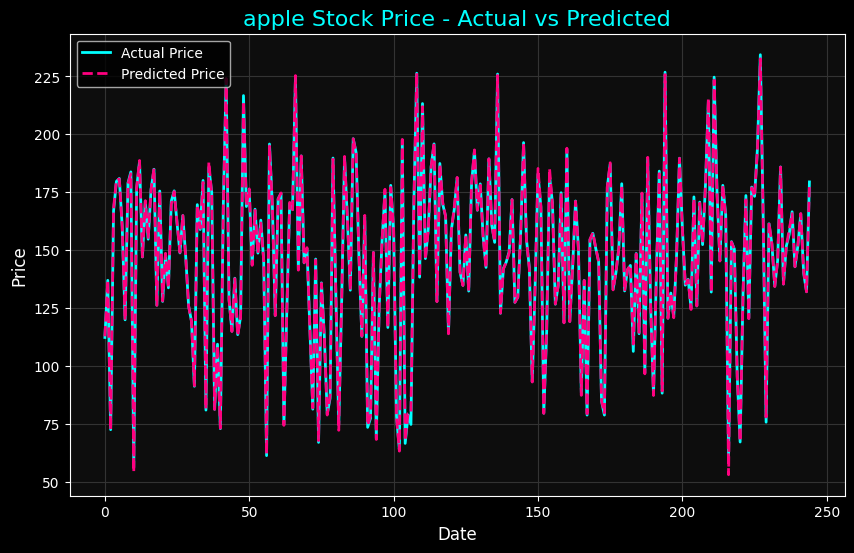

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the cyberpunk theme colors
cyberpunk_blue = '#00FFFF'
cyberpunk_red = '#FF007F'
cyberpunk_background = '#0D0D0D'

# Customize the plot style
plt.style.use('dark_background')

# Plot for apple stock
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test_apple)), y_test_apple, color=cyberpunk_blue, label='Actual Price', linewidth=2)
plt.plot(np.arange(len(y_pred_apple)), y_pred_apple, color=cyberpunk_red, linestyle='--', label='Predicted Price', linewidth=2)
plt.title('apple Stock Price - Actual vs Predicted', fontsize=16, color=cyberpunk_blue)
plt.xlabel('Date', fontsize=12, color='white')
plt.ylabel('Price', fontsize=12, color='white')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, color='#333333')
plt.gca().set_facecolor(cyberpunk_background)
plt.show()

**RANDOM FOREST MODEL:**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
rf_apple = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_apple.fit(X_train_apple, y_train_apple)

# Predict on the test data
y_pred_rf_apple = rf_apple.predict(X_test_apple)

# Evaluate the model
mse_rf_apple = mean_squared_error(y_test_apple, y_pred_rf_apple)
r2_rf_apple = r2_score(y_test_apple, y_pred_rf_apple)

print("apple Random Forest Performance:")
print(f"Mean Squared Error: {mse_rf_apple}")
print(f"R-squared: {r2_rf_apple}")

apple Random Forest Performance:
Mean Squared Error: 2.8299638069598316
R-squared: 0.9979925979980568


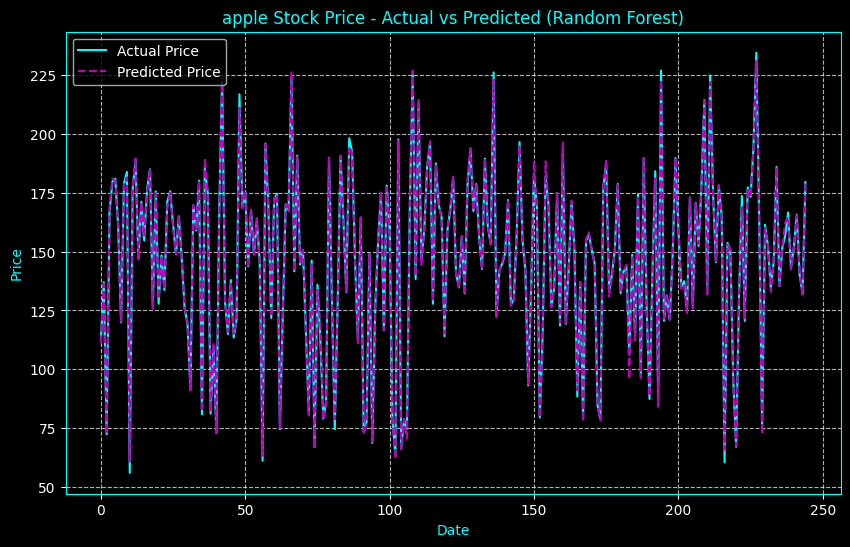

In [ ]:
# Visualization for Random Forest - apple
plt.figure(figsize=(10, 6))
plt.plot(y_test_apple[:250].values, color="cyan", label="Actual Price")
plt.plot(y_pred_rf_apple[:250], 'm--', label="Predicted Price")
plt.title("apple Stock Price - Actual vs Predicted (Random Forest)", color="cyan")
plt.xlabel("Date", color="cyan")
plt.ylabel("Price", color="cyan")
plt.legend(loc="best")
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor("black")
plt.gca().spines["bottom"].set_color("cyan")
plt.gca().spines["top"].set_color("cyan")
plt.gca().spines["left"].set_color("cyan")
plt.gca().spines["right"].set_color("cyan")
plt.show()

FEATURE IMPORTANCE ANALYSIS:

explore which features (7-day MA, 30-day volatility, etc.) had the most influence on the stock price predictions.

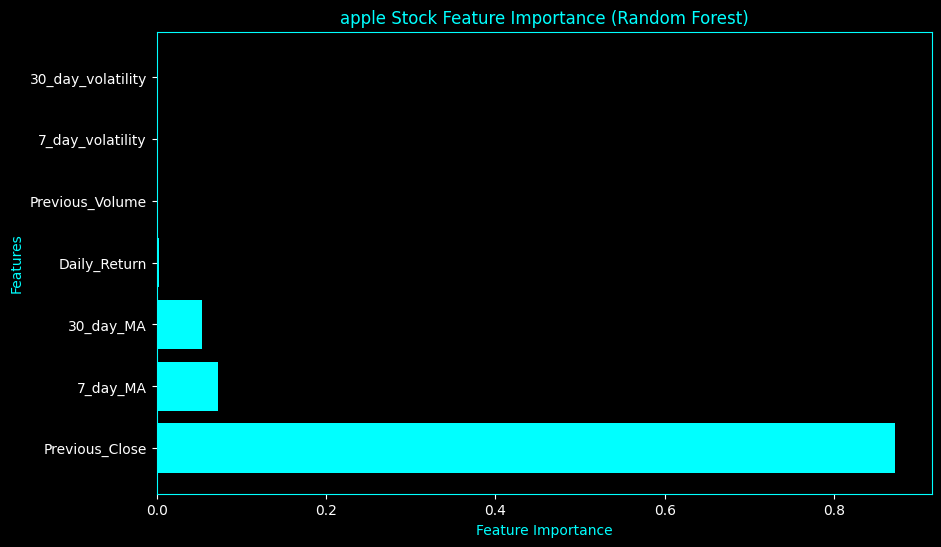

In [ ]:
# Get feature importance from the Random Forest model
importances_apple = rf_apple.feature_importances_

# Create a dataframe for the features and their importance
feature_names_apple = X_train_apple.columns
importance_df_apple = pd.DataFrame({
    'Feature': feature_names_apple,
    'Importance': importances_apple
})

# Sort the dataframe by importance
importance_df_apple = importance_df_apple.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df_apple['Feature'], importance_df_apple['Importance'], color='cyan')
plt.xlabel('Feature Importance', color='cyan')
plt.ylabel('Features', color='cyan')
plt.title('apple Stock Feature Importance (Random Forest)', color='cyan')
plt.gca().set_facecolor('black')
plt.gca().spines['bottom'].set_color('cyan')
plt.gca().spines['top'].set_color('cyan')
plt.gca().spines['left'].set_color('cyan')
plt.gca().spines['right'].set_color('cyan')
plt.show()

**GRADIENT BOOSTING REGRESSOR:**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Gradient Boosting model
gb_apple = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
gb_apple.fit(X_train_apple, y_train_apple)

# Predict on the test data
y_pred_gb_apple = gb_apple.predict(X_test_apple)

# Evaluate the model
mse_gb_apple = mean_squared_error(y_test_apple, y_pred_gb_apple)
r2_gb_apple = r2_score(y_test_apple, y_pred_gb_apple)

print("apple Gradient Boosting Performance:")
print(f"Mean Squared Error: {mse_gb_apple}")
print(f"R-squared: {r2_gb_apple}")

apple Gradient Boosting Performance:
Mean Squared Error: 1.7357465757998234
R-squared: 0.9987687682992421


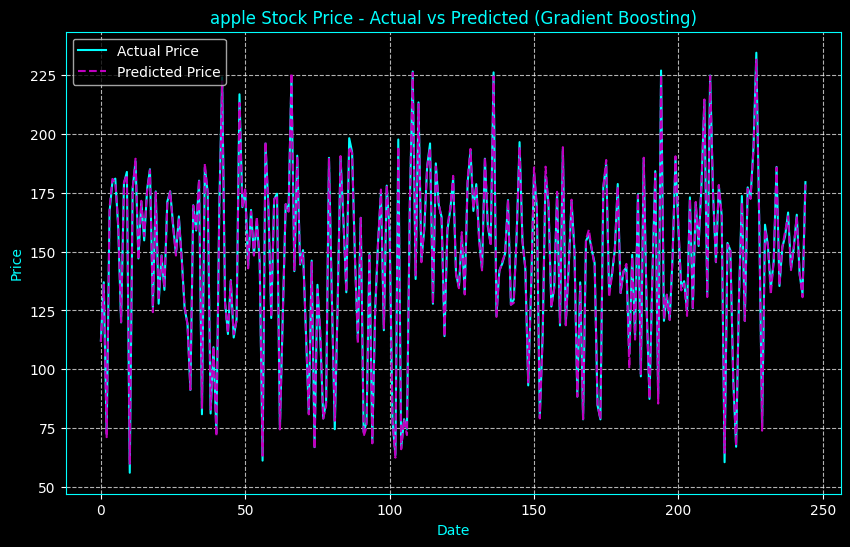

In [ ]:
# Visualization for Gradient Boosting - apple
plt.figure(figsize=(10, 6))
plt.plot(y_test_apple[:250].values, color="cyan", label="Actual Price")
plt.plot(y_pred_gb_apple[:250], 'm--', label="Predicted Price")
plt.title("apple Stock Price - Actual vs Predicted (Gradient Boosting)", color="cyan")
plt.xlabel("Date", color="cyan")
plt.ylabel("Price", color="cyan")
plt.legend(loc="best")
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor("black")
plt.gca().spines["bottom"].set_color("cyan")
plt.gca().spines["top"].set_color("cyan")
plt.gca().spines["left"].set_color("cyan")
plt.gca().spines["right"].set_color("cyan")
plt.show()

HYPERPARAMETER TUNING:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used in update
    'max_depth': [3, 5, 7],  # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize the Gradient Boosting Regressor for apple
gb_apple = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV to find the best parameters
grid_search_apple = GridSearchCV(estimator=gb_apple, param_grid=param_grid,
                                 cv=5, n_jobs=-1, verbose=2)

# Fit the model to the apple training data
grid_search_apple.fit(X_train_apple, y_train_apple)

# Get the best parameters from GridSearch
best_params_apple = grid_search_apple.best_params_
print("Best parameters for apple:", best_params_apple)

# Evaluate the model with the best parameters
best_gb_apple = grid_search_apple.best_estimator_
y_pred_apple = best_gb_apple.predict(X_test_apple)

# Calculate the performance metrics
mse_apple = mean_squared_error(y_test_apple, y_pred_apple)
r2_apple = r2_score(y_test_apple, y_pred_apple)

print(f"apple Gradient Boosting Performance (Tuned):")
print(f"Mean Squared Error: {mse_apple}")
print(f"R-squared: {r2_apple}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for apple: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
apple Gradient Boosting Performance (Tuned):
Mean Squared Error: 1.3231767297232664
R-squared: 0.9990614199341918


SAVING THE TUNED MODEL:

In [ ]:
import joblib
joblib.dump(best_gb_apple, 'best_gb_apple_model.pkl')

['best_gb_apple_model.pkl']

(FOR FUTURE REFERENCE): LOAD MODEL

In [ ]:
#import joblib

# best_gb_apple_loaded = joblib.load('best_gb_apple_model.pkl')
# future_predictions = best_gb_apple_loaded.predict(new_data)

**Long Short-Term Memory (LSTM) Neural Network for stock price prediction:**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Feature scaling
scaler = StandardScaler()
X_train_apple_scaled = scaler.fit_transform(X_train_apple)
X_test_apple_scaled = scaler.transform(X_test_apple)

# Define the neural network model
model_apple = Sequential([
    Dense(64, input_dim=X_train_apple.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model_apple.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_apple = model_apple.fit(X_train_apple_scaled, y_train_apple, validation_split=0.2, epochs=50, batch_size=32)

# Predict on the test set
y_pred_nn_apple = model_apple.predict(X_test_apple_scaled)

# Evaluate the performance
mse_apple_nn = mean_squared_error(y_test_apple, y_pred_nn_apple)
r2_apple_nn = r2_score(y_test_apple, y_pred_nn_apple)

print(f"apple Neural Network Performance:")
print(f"Mean Squared Error: {mse_apple_nn}")
print(f"R-squared: {r2_apple_nn}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 23053.7344 - val_loss: 22502.4160
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22223.2832 - val_loss: 21955.3223
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21436.6172 - val_loss: 20907.6035
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20428.6133 - val_loss: 19139.3750
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18658.2246 - val_loss: 16534.7031
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15975.2510 - val_loss: 13274.0908
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12920.2598 - val_loss: 9816.4004
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9161.0771 - val_loss: 6697.6299
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6187.8525 - val_loss: 4440.6348
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4101.1753 - val_loss: 3252.6956
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3072.9016 - val_loss: 2751.

Notes:
You can adjust the number of neurons, layers, epochs, and batch size to optimize the model.
The StandardScaler ensures that all features are on the same scale, which is important for neural networks.
The models are trained for 50 epochs, but you can adjust the number of epochs based on the performance.


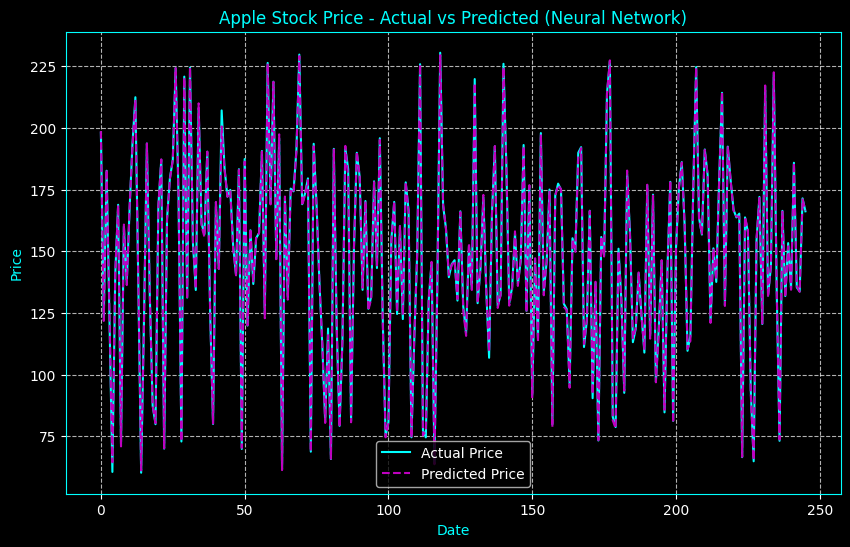

In [ ]:
# apple Neural Network Predictions Visualization
plt.figure(figsize=(10, 6))
plt.plot(y_test_apple[:250].values, color="cyan", label="Actual Price")
plt.plot(y_pred_apple[:250], 'm--', label="Predicted Price")
plt.title("apple Stock Price - Actual vs Predicted (Neural Network)", color="cyan")
plt.xlabel("Date", color="cyan")
plt.ylabel("Price", color="cyan")
plt.legend(loc="best")
plt.grid(True, linestyle="--", alpha=0.7)
plt.gca().set_facecolor("black")
plt.gca().spines["bottom"].set_color("cyan")
plt.gca().spines["top"].set_color("cyan")
plt.gca().spines["left"].set_color("cyan")
plt.gca().spines["right"].set_color("cyan")
plt.show()

In [ ]:
# Save the Neural Network model for apple in the native Keras format
model_apple.save('best_nn_apple_model_tuned.keras')

In [ ]:
joblib.dump(model_apple, 'linear_reg_apple_model.pkl')

['linear_reg_apple_model.pkl']

In [ ]:
joblib.dump(rf_apple, 'random_forest_apple_model.pkl')

['random_forest_apple_model.pkl']

In [ ]:
joblib.dump(best_gb_apple, 'gradient_boost_apple_model.pkl')

['gradient_boost_apple_model.pkl']

In [ ]:
import joblib
from tensorflow.keras.models import load_model

# Load all Models for apple:

# Load Linear Regression model
linear_reg_apple_model = joblib.load('linear_reg_apple_model.pkl')

# Load Random Forest model
random_forest_apple_model = joblib.load('random_forest_apple_model.pkl')

# Load Gradient Boosting model
gradient_boost_apple_model = joblib.load('gradient_boost_apple_model.pkl')

# Load the saved Neural Network model for apple
best_nn_apple = load_model('best_nn_apple_model_tuned.keras')

In [ ]:
import os
for file in os.listdir():
    print(file)

.config
gradient_boost_apple_model.pkl
best_nn_apple_model_tuned.keras
random_forest_apple_model.pkl
best_gb_apple_model.pkl
linear_reg_apple_model.pkl
sample_data


In [ ]:
from google.colab import files

# Download models to local machine
files.download('linear_reg_apple_model.pkl')
files.download('random_forest_apple_model.pkl')
files.download('gradient_boost_apple_model.pkl')
files.download('best_nn_apple_model_tuned.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Dashboard:**

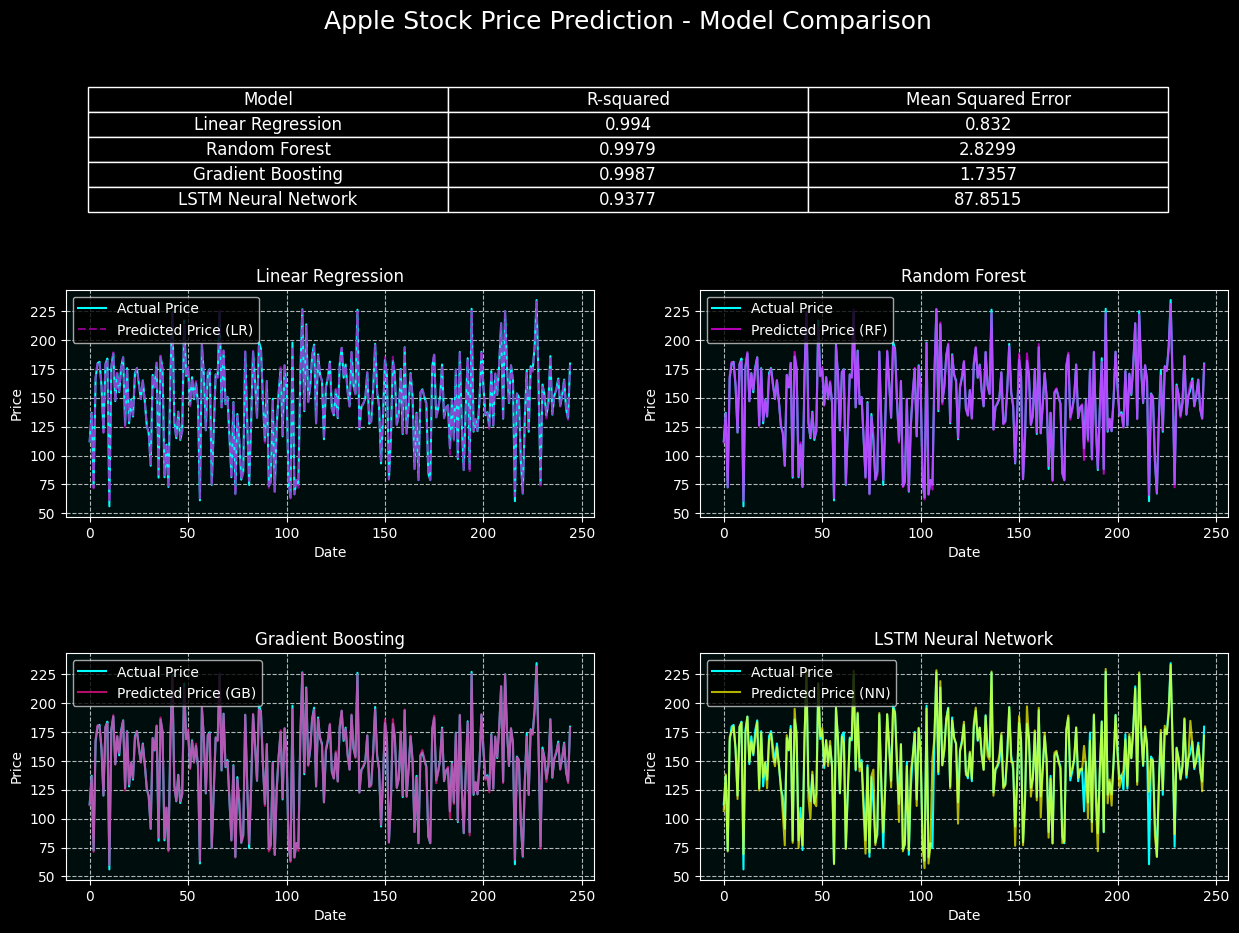

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define colors
cyberpunk_blue = '#00FFFF'
cyberpunk_pink = '#FF1493'  # This is the pink color for Gradient Boosting
cyberpunk_background = '#000D0D'
random_forest_color = '#FF00FF'  # Magenta for Random Forest
lstm_color = '#FFFF00'  # Yellow for LSTM

# Create subplots: 2 rows, 2 columns
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.6, top=0.70)  # Adjusting space between the charts and shifting top margin for title

# Title for the entire figure
fig.suptitle('Apple Stock Price Prediction - Model Comparison', fontsize=18, color='white')

# Table with model performance metrics
table_data = [
    ["Model", "R-squared", "Mean Squared Error"],
    ["Linear Regression", 0.9940, 0.8320],
    ["Random Forest", 0.9979, 2.8299],
    ["Gradient Boosting", 0.9987, 1.7357],
    ["LSTM Neural Network", 0.9377, 87.8515]
]

# Add the table without extra space
ax_table = fig.add_axes([0.1, 0.78, 0.8, 0.12])  # Shifting the table slightly lower
ax_table.axis('off')
table = ax_table.table(cellText=table_data, colWidths=[0.3]*3, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

# Set table background to black and text to white
for key, cell in table.get_celld().items():
    cell.set_edgecolor('white')
    cell.set_text_props(color='white')
    cell.set_facecolor('black')

# Plot 1: Linear Regression
axs[0, 0].plot(np.arange(len(y_test_apple[:250])), y_test_apple[:250], color=cyberpunk_blue, label='Actual Price')
axs[0, 0].plot(np.arange(len(y_pred_apple[:250])), y_pred_apple[:250], 'm--', label='Predicted Price (LR)', alpha=0.7)
axs[0, 0].set_title('Linear Regression', fontsize=12, color='white')
axs[0, 0].set_xlabel('Date', fontsize=10, color='white')
axs[0, 0].set_ylabel('Price', fontsize=10, color='white')
axs[0, 0].legend(loc='upper left')
axs[0, 0].grid(True, linestyle='--', alpha=0.7)
axs[0, 0].set_facecolor(cyberpunk_background)

# Plot 2: Random Forest (Magenta)
axs[0, 1].plot(np.arange(len(y_test_apple[:250])), y_test_apple[:250], color=cyberpunk_blue, label='Actual Price')
axs[0, 1].plot(np.arange(len(y_pred_rf_apple[:250])), y_pred_rf_apple[:250], color=random_forest_color, label='Predicted Price (RF)', alpha=0.7)
axs[0, 1].set_title('Random Forest', fontsize=12, color='white')
axs[0, 1].set_xlabel('Date', fontsize=10, color='white')
axs[0, 1].set_ylabel('Price', fontsize=10, color='white')
axs[0, 1].legend(loc='upper left')
axs[0, 1].grid(True, linestyle='--', alpha=0.7)
axs[0, 1].set_facecolor(cyberpunk_background)

# Plot 3: Gradient Boosting (Pink)
axs[1, 0].plot(np.arange(len(y_test_apple[:250])), y_test_apple[:250], color=cyberpunk_blue, label='Actual Price')
axs[1, 0].plot(np.arange(len(y_pred_gb_apple[:250])), y_pred_gb_apple[:250], color=cyberpunk_pink, label='Predicted Price (GB)', alpha=0.7)  # Pink color
axs[1, 0].set_title('Gradient Boosting', fontsize=12, color='white')
axs[1, 0].set_xlabel('Date', fontsize=10, color='white')
axs[1, 0].set_ylabel('Price', fontsize=10, color='white')
axs[1, 0].legend(loc='upper left')
axs[1, 0].grid(True, linestyle='--', alpha=0.7)
axs[1, 0].set_facecolor(cyberpunk_background)

# Plot 4: LSTM Neural Network (Yellow)
axs[1, 1].plot(np.arange(len(y_test_apple[:250])), y_test_apple[:250], color=cyberpunk_blue, label='Actual Price')
axs[1, 1].plot(np.arange(len(y_pred_nn_apple[:250])), y_pred_nn_apple[:250], color=lstm_color, label='Predicted Price (NN)', alpha=0.7)
axs[1, 1].set_title('LSTM Neural Network', fontsize=12, color='white')
axs[1, 1].set_xlabel('Date', fontsize=10, color='white')
axs[1, 1].set_ylabel('Price', fontsize=10, color='white')
axs[1, 1].legend(loc='upper left')
axs[1, 1].grid(True, linestyle='--', alpha=0.7)
axs[1, 1].set_facecolor(cyberpunk_background)

# Display the final dashboard
plt.show()